In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.inspection import permutation_importance
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.under_sampling import RandomUnderSampler, NearMiss, EditedNearestNeighbours, RepeatedEditedNearestNeighbours, AllKNN, CondensedNearestNeighbour
from sklearn.inspection import partial_dependence

In [ ]:
# combined data
# load processed data
train_mean = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_mean_mode.csv')
train_latest = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_latest.csv')
train_dispers = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_entropy_std.csv')
train_min = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_min.csv')
train_max = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_max.csv')
train_q1 = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_q1.csv')
train_q3 = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_q3.csv')
train_kurtosis = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_kurtosis.csv')
train_skewness = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_skewness.csv')
train_range = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_range.csv')
train_iqr = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_iqr.csv')
train_latest = train_latest.drop(train_latest.columns[0:13], axis=1)
train_dispers = train_dispers.drop(train_dispers.columns[0:13], axis=1)
train_min = train_min.drop(train_min.columns[0:13], axis=1)
train_max = train_max.drop(train_max.columns[0:13], axis=1)
train_q1 = train_q1.drop(train_q1.columns[0:13], axis=1)
train_q3 = train_q3.drop(train_q3.columns[0:13], axis=1)
train_kurtois = train_kurtosis.drop(train_kurtosis.columns[0:13], axis=1)
train_skewness = train_skewness.drop(train_skewness.columns[0:13], axis=1)
train_range = train_range.drop(train_range.columns[0:13], axis=1)
train_iqr = train_iqr.drop(train_iqr.columns[0:13], axis=1)

# merge train_ and train_latest
train = pd.concat([train_mean, train_latest, train_dispers, train_min, train_max], axis=1)

# load processed data
test_mean = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_mean_mode.csv')
test_latest = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_latest.csv')
test_dispers = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_entropy_std.csv')
test_min = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_min.csv')
test_max = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_max.csv')
test_q1 = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_q1.csv')
test_q3 = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_q3.csv')
test_kurtosis = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_kurtosis.csv')
test_skewness = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_skewness.csv')
test_range = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_range.csv')
test_iqr = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_iqr.csv')
test_latest = test_latest.drop(test_latest.columns[0:12], axis=1)
test_dispers = test_dispers.drop(test_dispers.columns[0:12], axis=1)
test_min = test_min.drop(test_min.columns[0:12], axis=1)
test_max = test_max.drop(test_max.columns[0:12], axis=1)
test_q1 = test_q1.drop(test_q1.columns[0:12], axis=1)
test_q3 = test_q3.drop(test_q3.columns[0:12], axis=1)
test_kurtosis = test_kurtosis.drop(test_kurtosis.columns[0:12], axis=1)
test_skewness = test_skewness.drop(test_skewness.columns[0:12], axis=1)
test_range = test_range.drop(test_range.columns[0:12], axis=1)
test_iqr = test_iqr.drop(test_iqr.columns[0:12], axis=1)

# merge train_mean and train_latest
test = pd.concat([test_mean, test_latest, test_dispers, test_min, test_max], axis=1)

train = train.drop(train.columns[11], axis=1)
test = test.drop(test.columns[11], axis=1)

In [ ]:
x_train = train.iloc[:,12:]
y_train = train.iloc[:,11]
x_test = test.iloc[:,11:]

In [4]:
extra_trees = ExtraTreesClassifier(class_weight="balanced", n_estimators=900, min_samples_leaf=2, min_samples_split=2, max_features=0.1, max_depth=300, random_state=42)
extra_trees.fit(x_train, y_train)

ExtraTreesClassifier(class_weight='balanced', max_depth=300, max_features=0.1,
                     min_samples_leaf=2, n_estimators=900, random_state=42)

In [7]:
y_valid_scores = extra_trees.predict_proba(x_test)[:, 1]

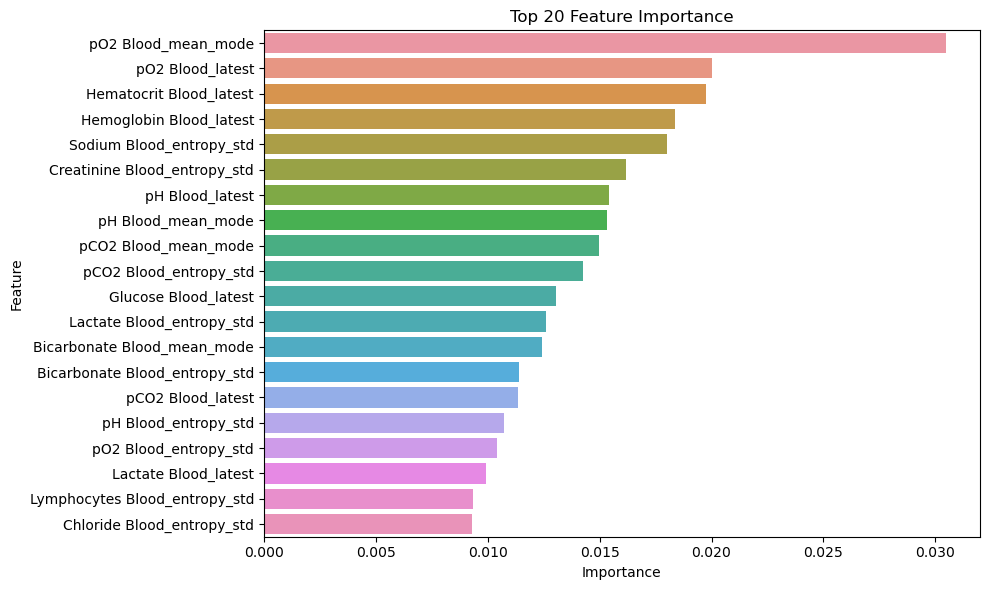

In [11]:
#plot feature importance based on extra trees (only top 20 features)
feature_importance = pd. DataFrame()
feature_importance[ 'Feature'] = x_train.columns
feature_importance['Importance'] = extra_trees.feature_importances_
feature_importance = feature_importance.sort_values (by='Importance', ascending=False).head (20)
feature_importance = feature_importance. reset_index (drop=True)
plt. figure(figsize=(10, 6))
sns.barplot (x= 'Importance', y= 'Feature', data=feature_importance)
plt.title('Top 20 Feature Importance')
plt.tight_layout ()

In [32]:
feature_names = feature_importance['Feature'].tolist()
print(feature_names)


['pO2 Blood_mean_mode', 'pO2 Blood_latest', 'Hematocrit Blood_latest', 'Hemoglobin Blood_latest', 'Sodium Blood_entropy_std', 'Creatinine Blood_entropy_std', 'pH Blood_latest', 'pH Blood_mean_mode', 'pCO2 Blood_mean_mode', 'pCO2 Blood_entropy_std', 'Glucose Blood_latest', 'Lactate Blood_entropy_std', 'Bicarbonate Blood_mean_mode', 'Bicarbonate Blood_entropy_std', 'pCO2 Blood_latest', 'pH Blood_entropy_std', 'pO2 Blood_entropy_std', 'Lactate Blood_latest', 'Lymphocytes Blood_entropy_std', 'Chloride Blood_entropy_std']


/Users/yommiqvq/anaconda3/lib/python3.11/site-packages/sklearn/utils/_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


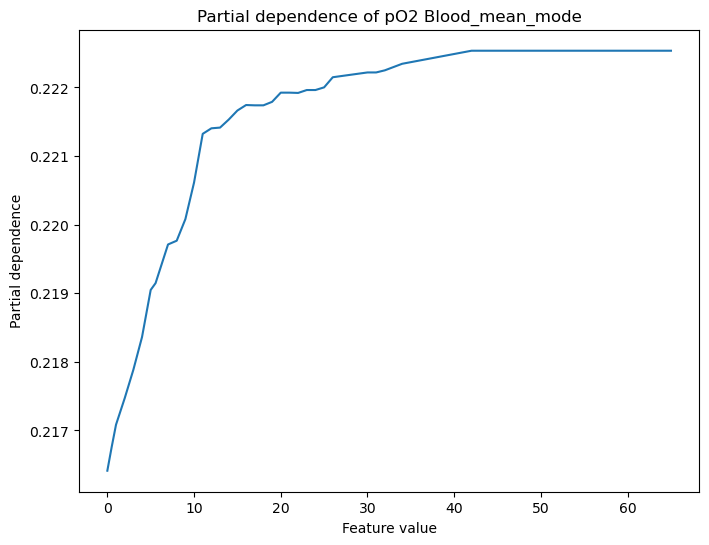

In [46]:
feature_indices = [0,]

# Compute partial dependence 
result = partial_dependence(extra_trees, x_train, feature_indices)
pdp = result['average']
axes = result['values']
for i, feature in enumerate(feature_indices):
    plt.figure(figsize=(8, 6))
    plt.plot(axes[i], pdp[i])
    plt.title(f'Partial dependence of {feature_names[feature]}')
    plt.xlabel('Feature value')
    plt.ylabel('Partial dependence')
    plt.show()

/Users/yommiqvq/anaconda3/lib/python3.11/site-packages/sklearn/utils/_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


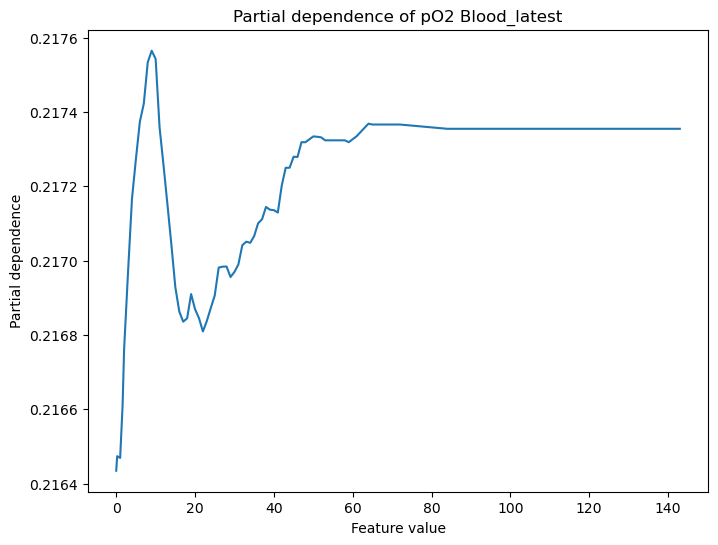

In [47]:
feature_indices = [1]
result = partial_dependence(extra_trees, x_train, feature_indices)
pdp = result['average']
axes = result['values']
for i, feature in enumerate(feature_indices):
    plt.figure(figsize=(8, 6))
    plt.plot(axes[i], pdp[i])
    plt.title(f'Partial dependence of {feature_names[feature]}')
    plt.xlabel('Feature value')
    plt.ylabel('Partial dependence')
    plt.show()

/Users/yommiqvq/anaconda3/lib/python3.11/site-packages/sklearn/utils/_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


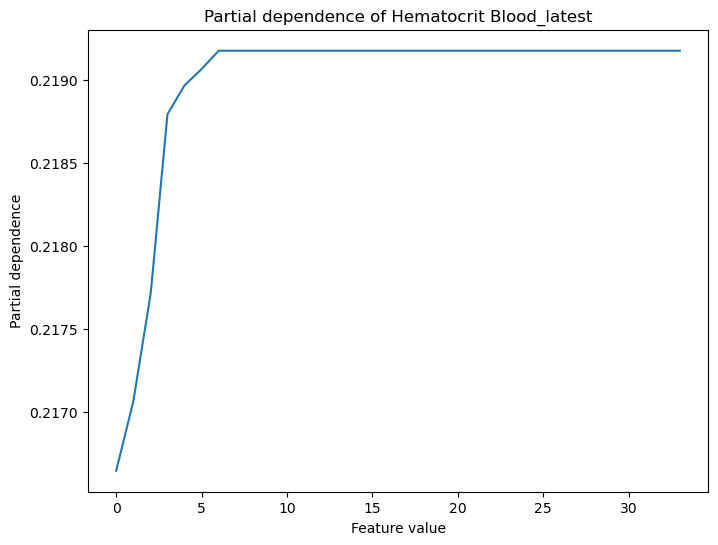

In [48]:
feature_indices = [2]
result = partial_dependence(extra_trees, x_train, feature_indices)
pdp = result['average']
axes = result['values']
for i, feature in enumerate(feature_indices):
    plt.figure(figsize=(8, 6))
    plt.plot(axes[i], pdp[i])
    plt.title(f'Partial dependence of {feature_names[feature]}')
    plt.xlabel('Feature value')
    plt.ylabel('Partial dependence')
    plt.show()

/Users/yommiqvq/anaconda3/lib/python3.11/site-packages/sklearn/utils/_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


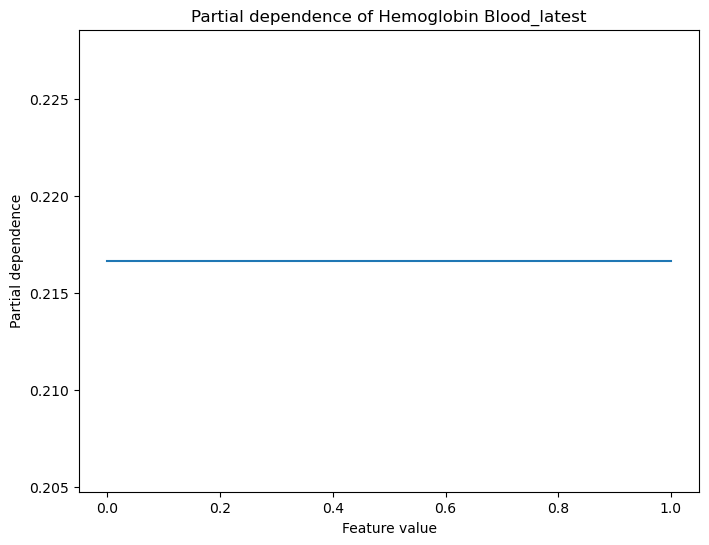

In [49]:
feature_indices = [3]
result = partial_dependence(extra_trees, x_train, feature_indices)
pdp = result['average']
axes = result['values']
for i, feature in enumerate(feature_indices):
    plt.figure(figsize=(8, 6))
    plt.plot(axes[i], pdp[i])
    plt.title(f'Partial dependence of {feature_names[feature]}')
    plt.xlabel('Feature value')
    plt.ylabel('Partial dependence')
    plt.show()

/Users/yommiqvq/anaconda3/lib/python3.11/site-packages/sklearn/utils/_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


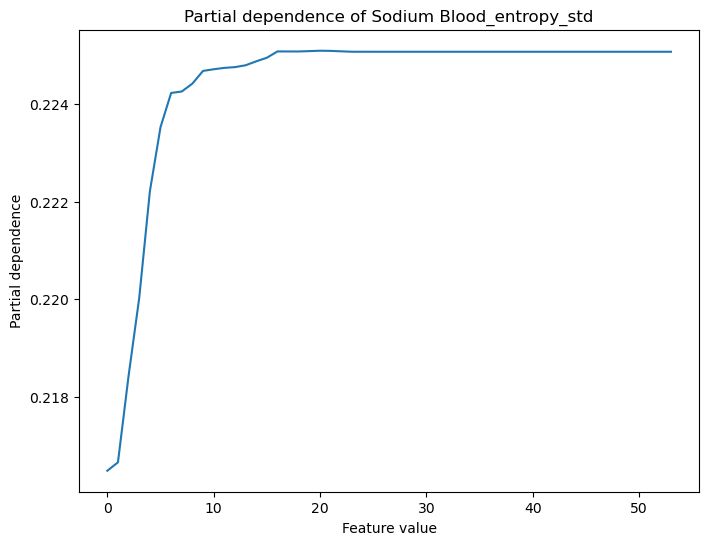

In [50]:
feature_indices = [4]
result = partial_dependence(extra_trees, x_train, feature_indices)
pdp = result['average']
axes = result['values']
for i, feature in enumerate(feature_indices):
    plt.figure(figsize=(8, 6))
    plt.plot(axes[i], pdp[i])
    plt.title(f'Partial dependence of {feature_names[feature]}')
    plt.xlabel('Feature value')
    plt.ylabel('Partial dependence')
    plt.show()

/Users/yommiqvq/anaconda3/lib/python3.11/site-packages/sklearn/utils/_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


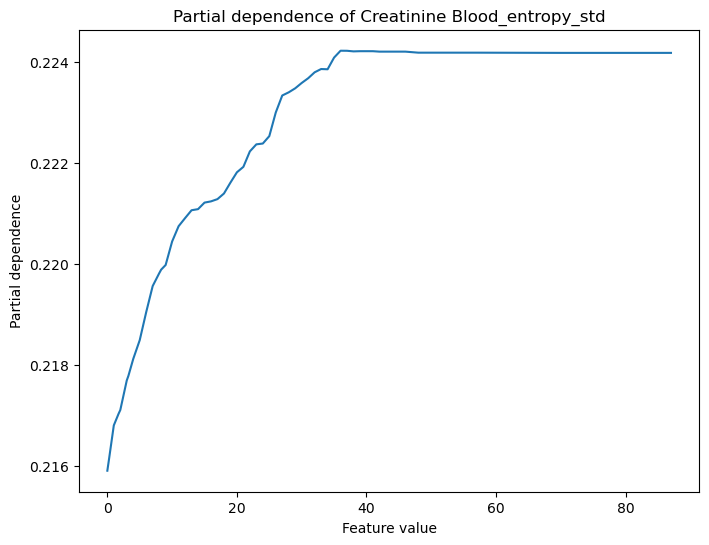

In [51]:
feature_indices = [5]
result = partial_dependence(extra_trees, x_train, feature_indices)
pdp = result['average']
axes = result['values']
for i, feature in enumerate(feature_indices):
    plt.figure(figsize=(8, 6))
    plt.plot(axes[i], pdp[i])
    plt.title(f'Partial dependence of {feature_names[feature]}')
    plt.xlabel('Feature value')
    plt.ylabel('Partial dependence')
    plt.show()